# Gráficos de probabilidad

In [1]:
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
excel_data = pd.read_excel('interarrival_times.xlsx')
dt = excel_data.groupby('tiempo').count()
dt.head()

,obs
tiempo,
0.01,8
0.02,2
0.03,3
0.04,6
0.05,10


In [3]:
dt.columns = ['count']
dt.head()

,count
tiempo,
0.01,8
0.02,2
0.03,3
0.04,6
0.05,10


In [4]:
n = excel_data['tiempo'].count()
promedio = excel_data['tiempo'].mean()
x = st.expon(scale=promedio)

In [5]:
dt['cum_count'] = dt['count'].cumsum()
dt['f'] = dt['cum_count'] / n
dt['f_bigote'] = dt['f'] - 0.5 / n
dt['f_gorro'] = x.cdf(dt.index)
dt['x_M'] = x.ppf(dt['f_bigote'])
dt.tail()

,count,cum_count,f,f_bigote,f_gorro,x_M
tiempo,,,,,,
1.44,1,215,0.981735,0.979452,0.972968,1.549385
1.51,1,216,0.986301,0.984018,0.977319,1.649613
1.72,1,217,0.990868,0.988584,0.986604,1.783802
1.83,1,218,0.995434,0.993151,0.989833,1.987526
1.96,1,219,1.000000,0.997717,0.992661,2.425667


## Q-Q Plot

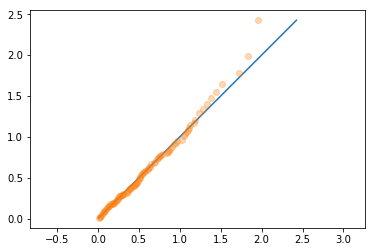

In [6]:
v_min = min(dt['x_M'].min(), dt.index.min())
v_max = max(dt['x_M'].max(), dt.index.max())
plt.plot([v_min, v_max], [v_min, v_max])
plt.plot(dt.index, dt['x_M'], 'o', ls='None', alpha=0.3)
plt.axis('equal');

## P-P Plot

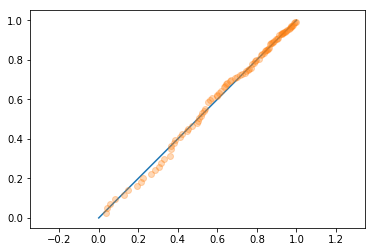

In [7]:
plt.plot([0, 1], [0, 1])
plt.plot(dt['f_bigote'], dt['f_gorro'], 'o', ls='None', alpha=0.3)
plt.axis('equal');

## Ambos gráficos juntos

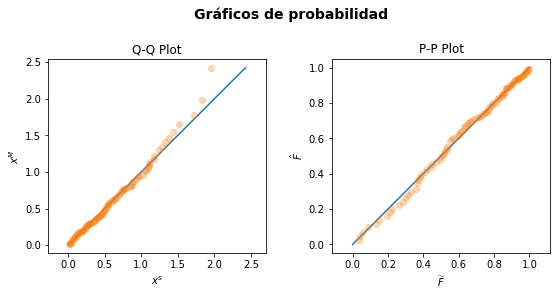

In [8]:
fig = plt.figure(figsize=(9, 4))
fig.suptitle('Gráficos de probabilidad', fontsize=14, fontweight='bold')

ax = fig.add_subplot(121)
ax.set_title('Q-Q Plot')
ax.set_xlabel('$x^s$')
ax.set_ylabel('$x^M$')
v_min = min(dt['x_M'].min(), dt.index.min())
v_max = max(dt['x_M'].max(), dt.index.max())
ax.plot([v_min, v_max], [v_min, v_max])
ax.plot(dt.index, dt['x_M'], 'o', ls='None', alpha=0.3)
ax.axis('equal');

ax = fig.add_subplot(122)
ax.set_title('P-P Plot')
ax.set_xlabel('$\widetilde{F}$')
ax.set_ylabel('$\hat{F}$')
ax.plot([0, 1], [0, 1])
ax.plot(dt['f_bigote'], dt['f_gorro'], 'o', ls='None', alpha=0.3)
ax.axis('equal');

fig.subplots_adjust(top=0.8, wspace=0.3)